In [ ]:
import numpy as np
import pandas as pd

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 주가 URL
samsung_url = 'https://github.com/KyoungmiKwon/Bigdata_Training_at_ITwill/raw/main/Team_Project/B05_KM_StockPrice_for_regression.xlsx'
lg_url = 'https://github.com/KyoungmiKwon/Bigdata_Training_at_ITwill/raw/main/Team_Project/B05_KM_StockPrice_066570_LG%EC%A0%84%EC%9E%90_200601-210416.xlsx'
yg_url = 'https://github.com/KyoungmiKwon/Bigdata_Training_at_ITwill/raw/main/Team_Project/B05_KM_StockPrice_122870_YG_200101-210416.xlsx'
jyp_url = 'https://github.com/KyoungmiKwon/Bigdata_Training_at_ITwill/raw/main/Team_Project/B05_KM_StockPrice_035900_JYP_200101-210416.xlsx'

In [ ]:
# 주가 데이터 불러오기
samsung_stock = pd.read_excel(samsung_url, header=0)
lg_stock = pd.read_excel(lg_url, header=0)
yg_stock = pd.read_excel(yg_url, header=0)
jyp_stock = pd.read_excel(jyp_url, header=0)

# 삼성

In [ ]:
samsung_stock[:3]

,Date,Open,High,Low,Close,Volume,Change
0,1997-05-03,1090,1093,1077,1087,67197,NaN
1,1997-05-06,1086,1093,1081,1092,93290,0.00460
2,1997-05-07,1084,1088,1077,1085,67110,-0.00641


In [ ]:
# 년도별 월별 일별 데이터 확인하려면 사용할 년월일 columns 생성
samsung_stock['year'] = samsung_stock['Date'].dt.year
samsung_stock['month'] = samsung_stock['Date'].dt.month
samsung_stock['day'] = samsung_stock['Date'].dt.day

In [ ]:
samsung_stock

,Date,Open,High,Low,Close,Volume,Change,year,month,day
0,1997-05-03,1090,1093,1077,1087,67197,NaN,1997,5,3
1,1997-05-06,1086,1093,1081,1092,93290,0.004600,1997,5,6
2,1997-05-07,1084,1088,1077,1085,67110,-0.006410,1997,5,7
3,1997-05-08,1083,1083,1054,1055,72610,-0.027650,1997,5,8
4,1997-05-09,1058,1067,1049,1065,80550,0.009479,1997,5,9
...,...,...,...,...,...,...,...,...,...,...
5994,2021-04-22,82900,83000,82400,82400,13934746,-0.002421,2021,4,22
5995,2021-04-23,81900,82900,81600,82800,17805080,0.004854,2021,4,23
5996,2021-04-26,82900,83500,82600,83500,15489938,0.008454,2021,4,26
5997,2021-04-27,83200,83300,82500,82900,12941533,-0.007186,2021,4,27


## 삼성 종가 변화 시계열 그래프

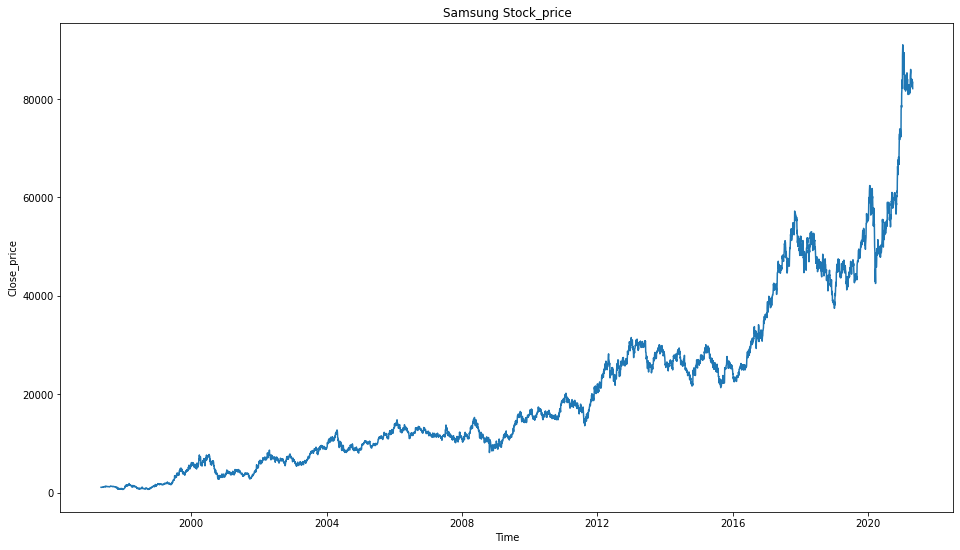

In [ ]:
# 삼성 종가 변화
plt.figure(figsize=(16, 9))
sns.lineplot(y=samsung_stock['Close'], x=samsung_stock['Date'])
plt.title('Samsung Stock_price')
plt.xlabel('Time')
plt.ylabel('Close_price')
plt.show()

## 삼성 거래량

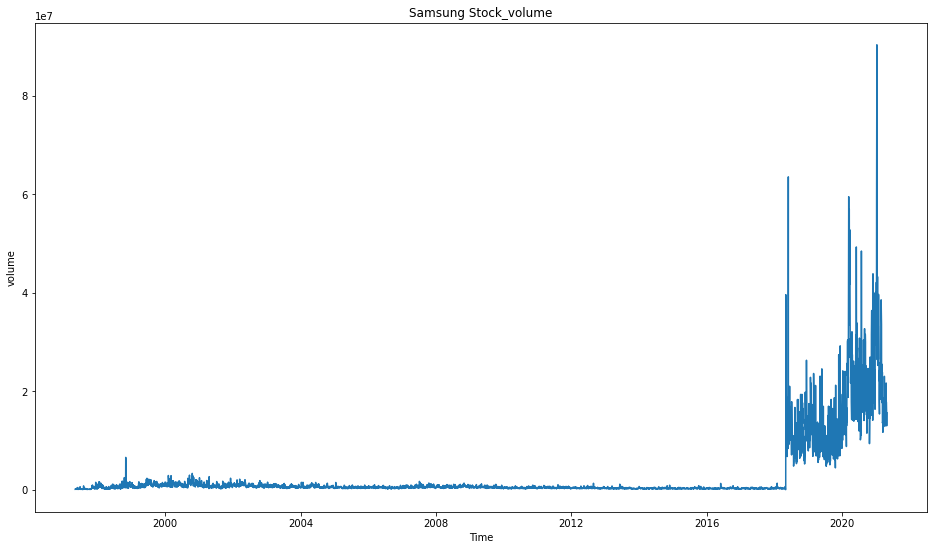

In [ ]:
# 삼성 거래량 변화 시계열 그래프
plt.figure(figsize=(16, 9))
sns.lineplot(y=samsung_stock['Volume'], x=samsung_stock['Date'])
plt.title('Samsung Stock_volume')
plt.xlabel('Time')
plt.ylabel('volume')
plt.show()

## 정규화

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
samsung_scaled = scaler.fit_transform(samsung_stock[scale_cols])
samsung_scaled = pd.DataFrame(samsung_scaled)
samsung_scaled.columns = scale_cols
samsung_scaled['Date'] = samsung_stock['Date']

In [ ]:
# 역 minmax 스케일링
# 정규화된 종가 데이터 -> 원래 종가
def reverse_min_max_scaling(org_x, x): 
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [ ]:
samsung_scaled[:3]

,Open,High,Low,Close,Volume,Date
0,0.012071,0.011291,0.012034,0.005090,0.000744,1997-05-03
1,0.012027,0.011291,0.012078,0.005145,0.001033,1997-05-06
2,0.012004,0.011240,0.012034,0.005068,0.000743,1997-05-07


## Train, Test split

In [ ]:
TEST_SIZE = 200    # 200일간의 주가를 예측하겠다
WINDOW_SIZE = 20   # 20일의 데이터를 기반으로 다음날 주가를 예측하겠다

train = samsung_scaled[:-TEST_SIZE]     
test = samsung_scaled[-TEST_SIZE:]      # 최근 200일간의 데이터 -> test 데이터

In [ ]:
def make_dataset(data, label, window_size=20):  #> 데이터 셋 window_size 수 만큼의 일주가 데이터로 예측 하기위해 dataset 나눔.
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))   # 예측하고자 하는 날의 전날부터 20일전까지의 주가 데이터
        label_list.append(np.array(label.iloc[i+window_size]))      # 예측하고자 하는 날의 label(Close:종가) 데이터
    return np.array(feature_list), np.array(label_list)

In [ ]:
#feature_cols = ['Open']
feature_cols = ['Open', 'High', 'Low', 'Volume']    # 특성 값 4개, 여기에 감성분석한 감성 -1,0,1 columns 넣어야 함.
label_cols = ['Close']                              # label 데이터(종가)

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset 생성
train_feature, train_label = make_dataset(train_feature, train_label, window_size=20)

# train, validation set 생성
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape, x_valid.shape)

# test dataset (실제 예측 해볼 데이터)
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
print(test_feature.shape, test_label.shape)


(4623, 20, 4) (1156, 20, 4)
(180, 20, 4) (180, 1)


## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
x_train.shape, y_train.shape

((4623, 20, 4), (4623, 1))

In [ ]:
model = Sequential()
model.add(LSTM(16, input_shape=(train_feature.shape[1], train_feature.shape[2]), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 조기종료
early_stop = EarlyStopping(monitor='val_loss', patience=5)

checkpoint = ModelCheckpoint('temp.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])


In [ ]:
test_feature.shape  # (TEST_SIZE - WINDOW_SIZE, WINDOW_SIZE, num_features)

(180, 20, 4)

In [ ]:
predicted_stock = model.predict(test_feature)

In [ ]:
predicted_stock #> 예측한 180 일자의 정규화된 주가 데이터 

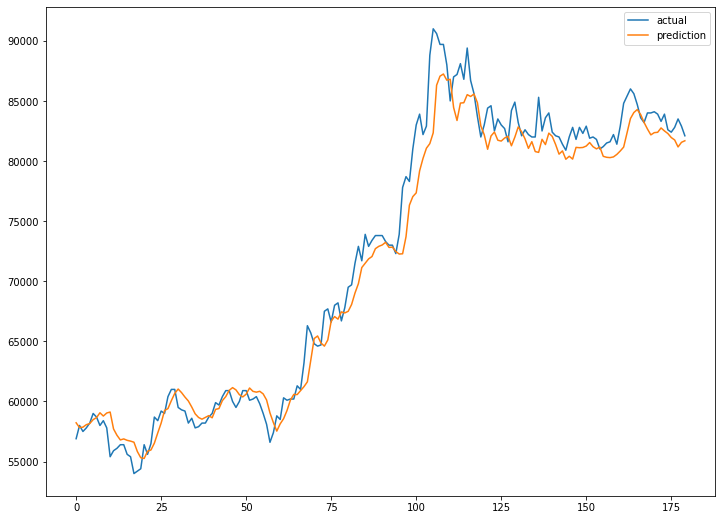

In [ ]:
# 180일 주가 예측 결과 시각화
plt.figure(figsize=(12, 9))
plt.plot(reverse_min_max_scaling(samsung_stock['Close'], test_label), label = 'actual')
plt.plot(reverse_min_max_scaling(samsung_stock['Close'], predicted_stock), label = 'prediction')
plt.legend()
plt.show()

In [ ]:
# 20일 전부터 오늘 까지의 데이터, Close = label 값, Date= 상관없어서 없앰
recent_data = np.array([samsung_scaled[len(samsung_scaled)- WINDOW_SIZE : ].drop(['Close', 'Date'], axis=1)])

In [ ]:
recent_data.shape

(1, 20, 4)

In [ ]:
reverse_min_max_scaling(samsung_stock['Close'], model.predict(recent_data))

array([[81609.87]], dtype=float32)